# Targeted Marketing Project
This project uses `KMeans Clustering` and `Principal Component Analysis` to cluster the various groups of customers to help the supermarket figure out the greatest yield advertising strategy it should perform.

## Importing needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [ ]:
customer_df = pd.read_csv("wholesale_customers.csv")
customer_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
customer_df.corr() #plotting a confusion matrix to view correlation values

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Performing Data Preprocessing
Using `StandardScaler` to perform Feature Scaling

In [ ]:
scaler = StandardScaler()
customer_data = scaler.fit_transform(customer_df)
customer_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

## Using PCA for dimensionality reduction
- Helps improve model performance and reduce dataset noise

In [ ]:
pca = PCA()
pca.fit(customer_data)
variances = pca.explained_variance_ratio_
variances

array([0.38750123, 0.22374588, 0.12647173, 0.09229904, 0.06957905,
       0.05741354, 0.03514076, 0.00784877])

### Using Scree Plots to view cumulative variance values

Text(0.5, 1.0, 'Explained Variable vs Number of Components')

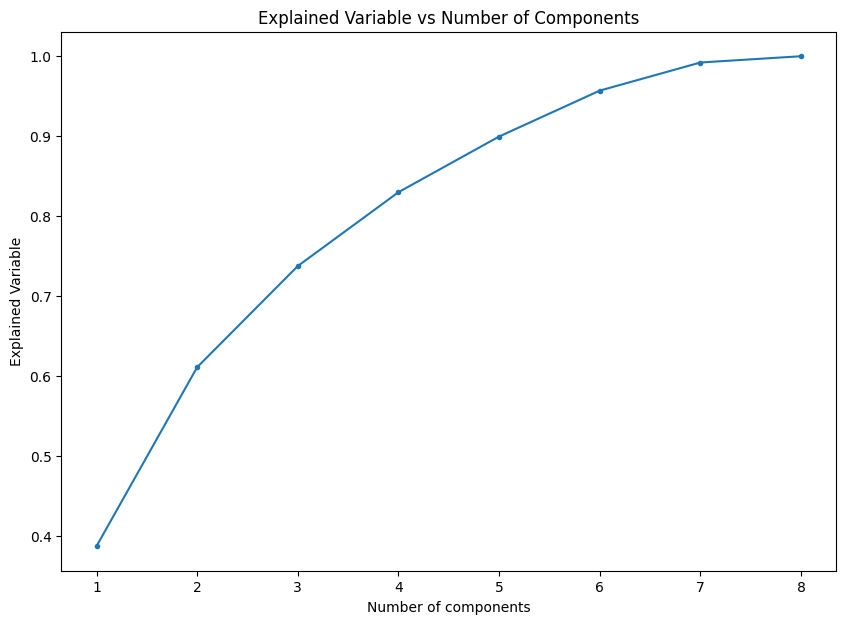

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 9), np.cumsum(variances), marker=".")
plt.xlabel("Number of components")
plt.ylabel("Explained Variable")
plt.title("Explained Variable vs Number of Components")

Since 5 components can preserve ~90% of the variance, we will use 5 components only.

In [ ]:
pca = PCA(n_components=5)
pca.fit(customer_data)
scores = pca.transform(customer_data)
scores

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 , -0.44623405],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178, -0.13045815],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276, -1.19381302],
       ...,
       [ 3.86514909, -0.47985376, -0.52534452, -0.68713197,  0.10896788],
       [-1.09706738, -0.06989568, -0.63012755,  0.31182088, -0.424792  ],
       [-1.16595067, -0.90215675, -0.59770486,  0.34265555, -0.0043876 ]])

## Clustering
We will use the `KMeans Clustering` algorithm, testing up to 10 clusters and plotting the `Within Cluster Sum of Square` values on a Scree Plot.

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init="auto", random_state=0)
  kmeans.fit(scores)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-Means Clustering for Customer Data')

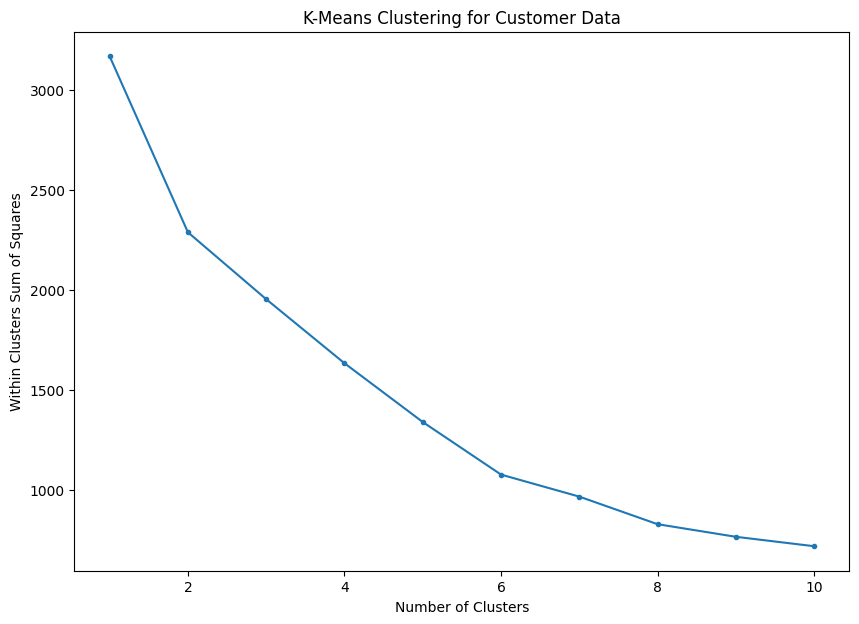

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker=".")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Squares")
plt.title("K-Means Clustering for Customer Data")

Using the Elbow Method, we will choose 2 clusters.

Alternatively I could use the Python package `Kneed`

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow

5

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
kmeans.fit(scores)

KMeans(n_clusters=5, n_init='auto', random_state=0)

## Visualising the Clusters

In [ ]:
#Obtain cluster labels
labels = kmeans.labels_
labels

array([0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3,
       2, 1, 0, 0, 3, 3, 0, 2, 3, 3, 3, 2, 3, 0, 2, 0, 0, 2, 2, 3, 0, 0,
       0, 0, 0, 1, 0, 0, 3, 3, 2, 0, 3, 3, 1, 0, 3, 3, 0, 1, 0, 0, 3, 1,
       3, 0, 3, 3, 2, 2, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 1, 1, 2,
       3, 2, 3, 3, 1, 2, 0, 3, 0, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0,
       3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 0, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       2, 3, 3, 3, 3, 2, 0, 4, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 2, 2, 0,
       3, 3, 0, 0, 2, 3, 3, 0, 3, 0, 3, 0, 3, 1, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       0, 2, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 0, 3, 0, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0,

In [ ]:
customer_df[["PC1", "PC2", "PC3", "PC4", "PC5"]] = scores
customer_df["labels"] = labels
customer_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,PC1,PC2,PC3,PC4,PC5,labels
0,2,3,12669,9656,7561,214,2674,1338,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,0
1,2,3,7057,9810,9568,1762,3293,1776,1.062676,-0.484601,-0.672975,0.401372,-0.130458,0
2,2,3,6353,8808,7684,2405,3516,7844,1.269141,0.682055,-0.664095,1.634953,-1.193813,0
3,1,3,13265,1196,4221,6404,507,1788,-1.056782,0.610821,-0.505654,0.196005,0.457855,3
4,2,3,22615,5410,7198,3915,1777,5185,0.634030,0.974199,-0.771209,0.186374,-0.813877,0


Visualising the 1st and 2nd components (PC1, PC2)

Text(0.5, 1.0, 'Visualising Clusters with PC1 and PC2')

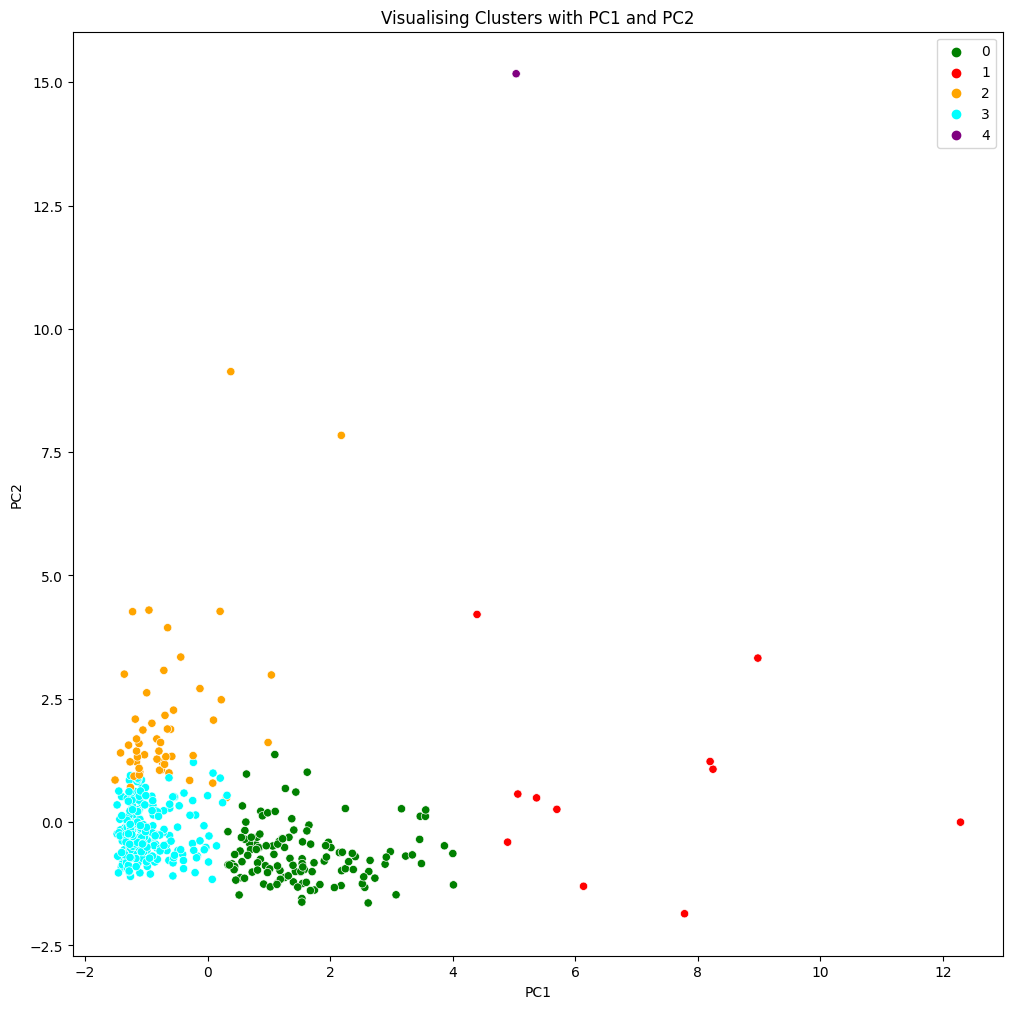

In [ ]:
X, y = customer_df["PC1"], customer_df["PC2"]
plt.figure(figsize=(12, 12))
sns.scatterplot(x=X, y=y, hue=labels, palette=["green", "red", "orange", "cyan", "purple"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualising Clusters with PC1 and PC2")

Cluster 1 and 4 consist largely of outliers, and removing them, we can see 3 clear clusters.

In [ ]:
df = customer_df.iloc[:, 2:8]
df["labels"] = customer_df["labels"]
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,0


In [ ]:
def average_by_label(feature_name, n_clusters=4):
  feature_arr = []
  for label in range(n_clusters):
    indices = df.loc[df["labels"] == label]
    feature_arr.append(np.mean(indices[feature_name]))
  return feature_arr

In [ ]:
features = list(df.columns)[:-1]
avg_features = []

for feature in features:
  avg_feature = average_by_label(feature)
  avg_features.append(avg_feature)

In [ ]:
avg_features

[[7408.51968503937, 16911.090909090908, 33974.730769230766, 9436.522088353413],
 [9170.55905511811, 34864.36363636364, 5487.846153846154, 2702.289156626506],
 [14424.212598425196,
  46126.181818181816,
  5744.826923076923,
  3375.0923694779117],
 [1332.0708661417323,
  3245.4545454545455,
  9483.288461538461,
  2478.3614457831327],
 [6248.708661417323, 23008.090909090908, 838.0192307692307, 712.3132530120482],
 [1586.023622047244, 4177.363636363636, 2674.5384615384614, 949.9919678714859]]

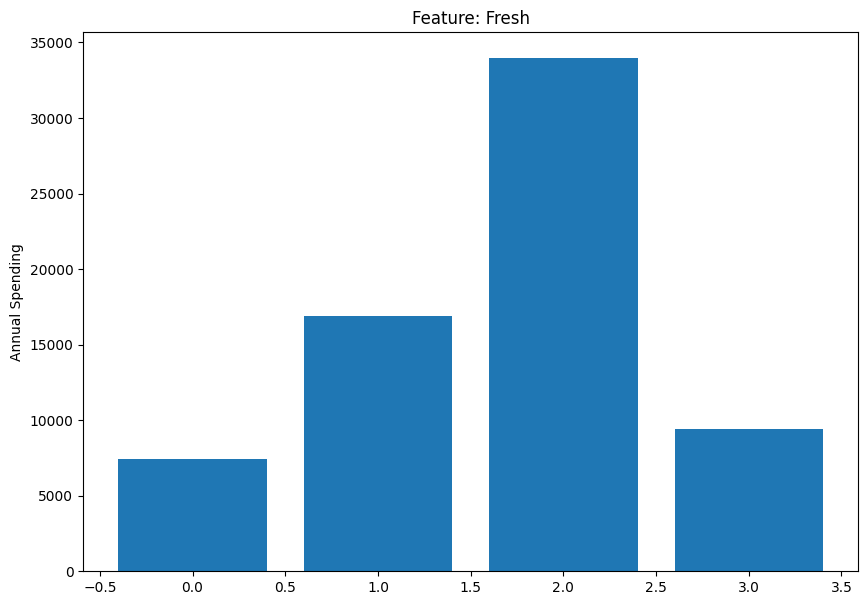

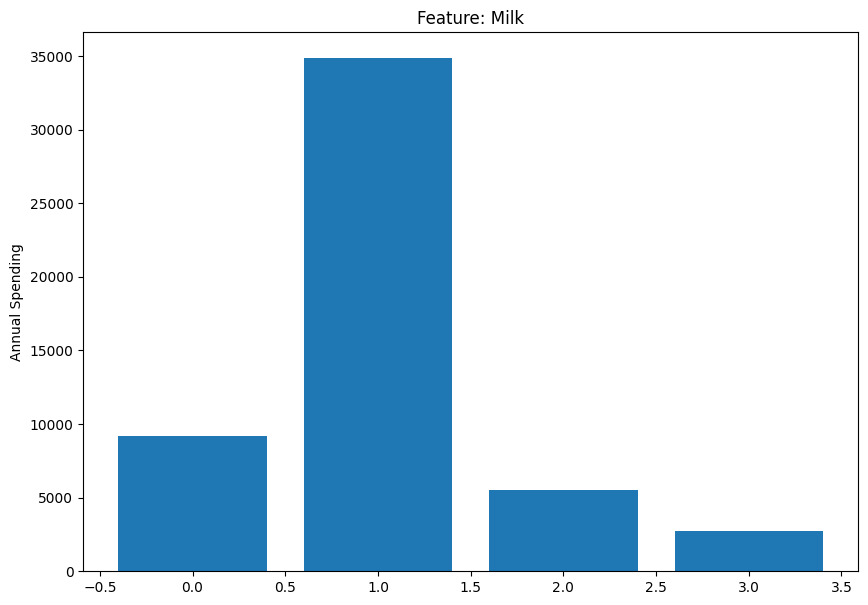

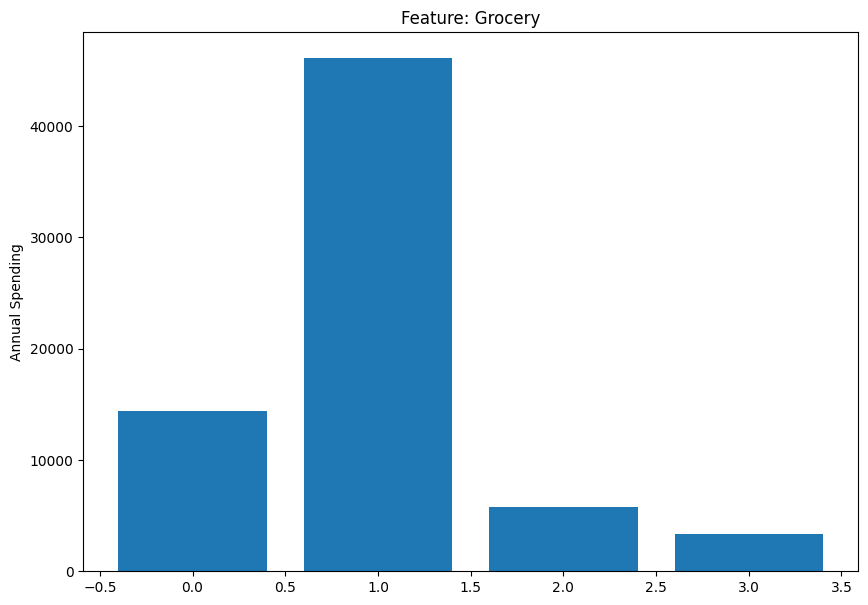

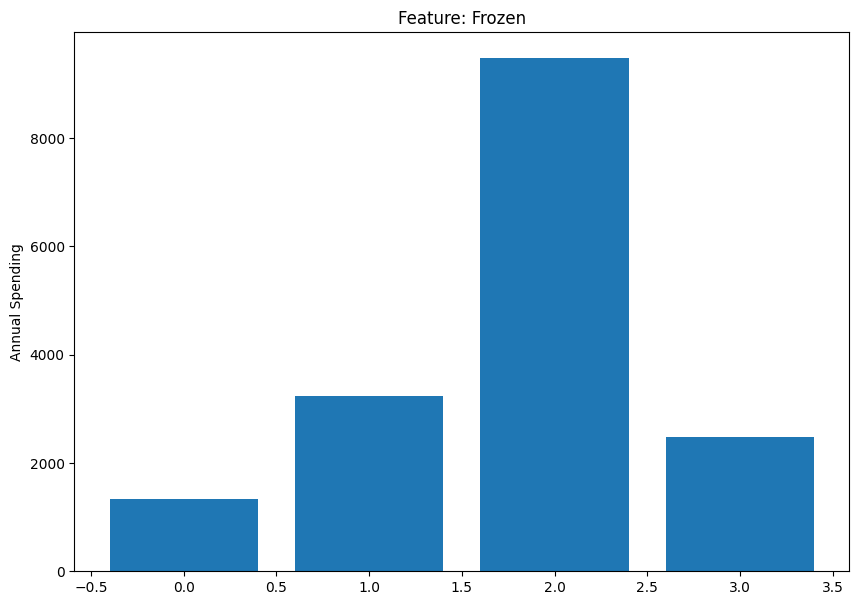

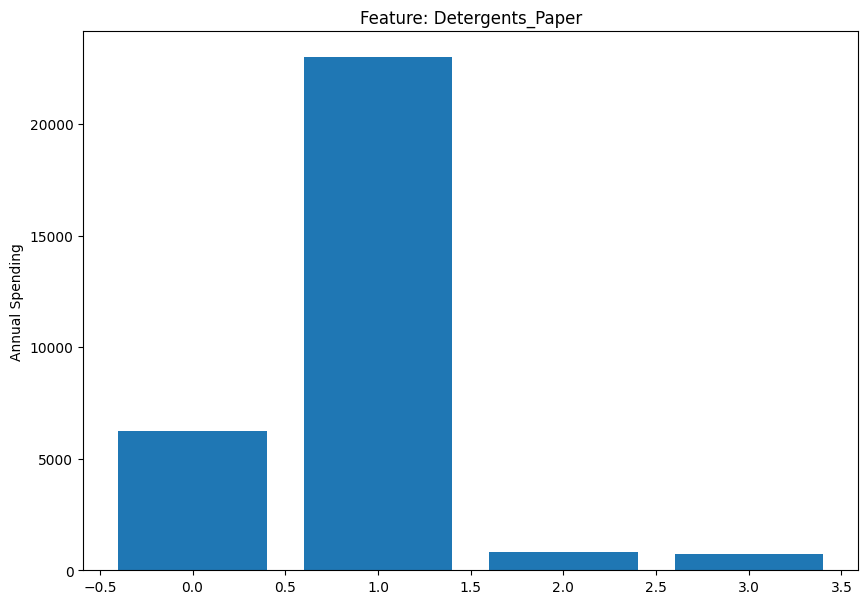

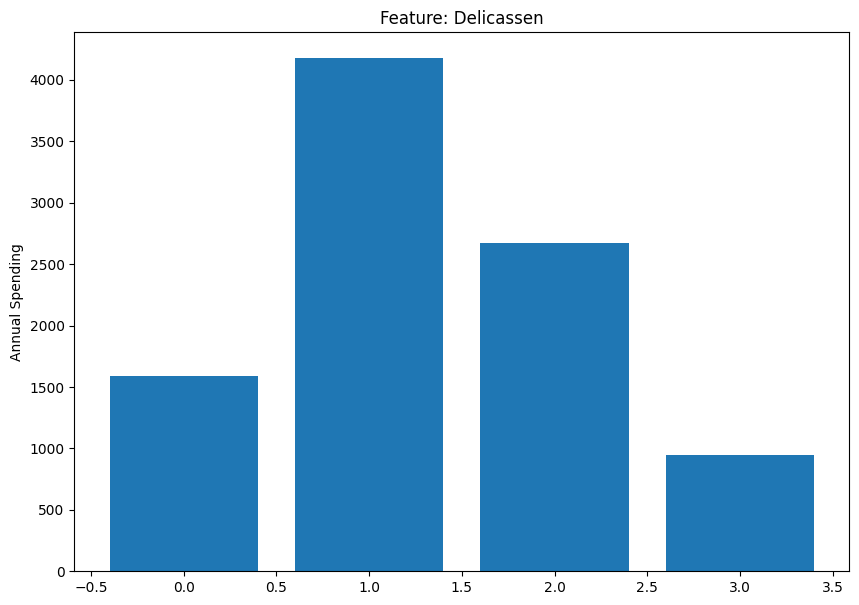

In [ ]:
for i, feature in enumerate(avg_features):
  plt.figure(figsize=(10, 7))
  plt.bar(range(4), feature)
  plt.title(f'Feature: {features[i]}')
  plt.ylabel("Annual Spending")

We can ignore Cluster 4 as an outlier cluster

## **Observations**
1. More **Fresh Food** advertising can be pushed to those in **Cluster 2**, less to those in **Cluster 0**.

2. More **Milk** advertising can be pushed to those in **Cluster 1**, less to those in **Cluster 3**.

3. More **Grocery** advertising can be pushed to those in **Cluster 1**, less to those in **Clusters 2 and 3**.

4. More **Frozen Food** advertising can be pushed to those in **Cluster 2**, less to those in **Cluster 0**.

5. More **Detergents** advertising can be pushed to those in **Cluster 1**, less to those in **Clusters 2 and 3**.

6. More **Delicassen** advertising can be pushed to those in **Cluster 1** and 2, less to those in **Cluster 3**.

7. Since **Milk** and **Delicatessen** products are less of necessities and more of luxury products, these 2 categories are quite correlated.